# Melanoma-Detection-Assignment

In [3]:
#Importing all the important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, cv2
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

# Data Reading/Data Understanding

In [13]:
# Importing Skin Cancer Data
# Defining the path for train and test images
data_dir_train = pathlib.Path(r"./Train")
data_dir_test = pathlib.Path(r"./Test")

In [15]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [17]:
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118


# Dataset creation

In [23]:
# Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [25]:
# Loading the training data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [27]:
# Loading the validation data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [29]:
# Loading the testing data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [31]:
# Listing out all the classes of skin cancer and store them in a list. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset visualisation

Creating a code to visualize one instance of all the nine classes present in the dataset



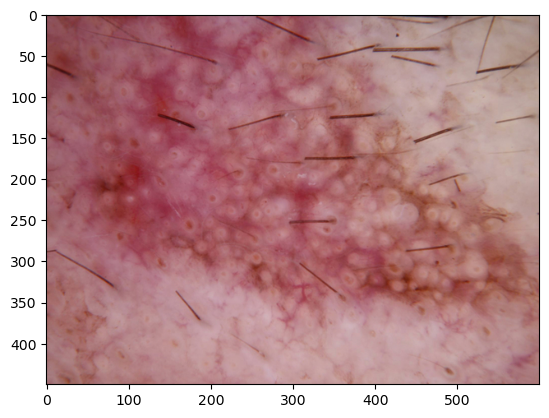

In [42]:
image = plt.imread((list(data_dir_train.glob(class_names[0]+'/*.jpg'))[0]))
plt.imshow(image)

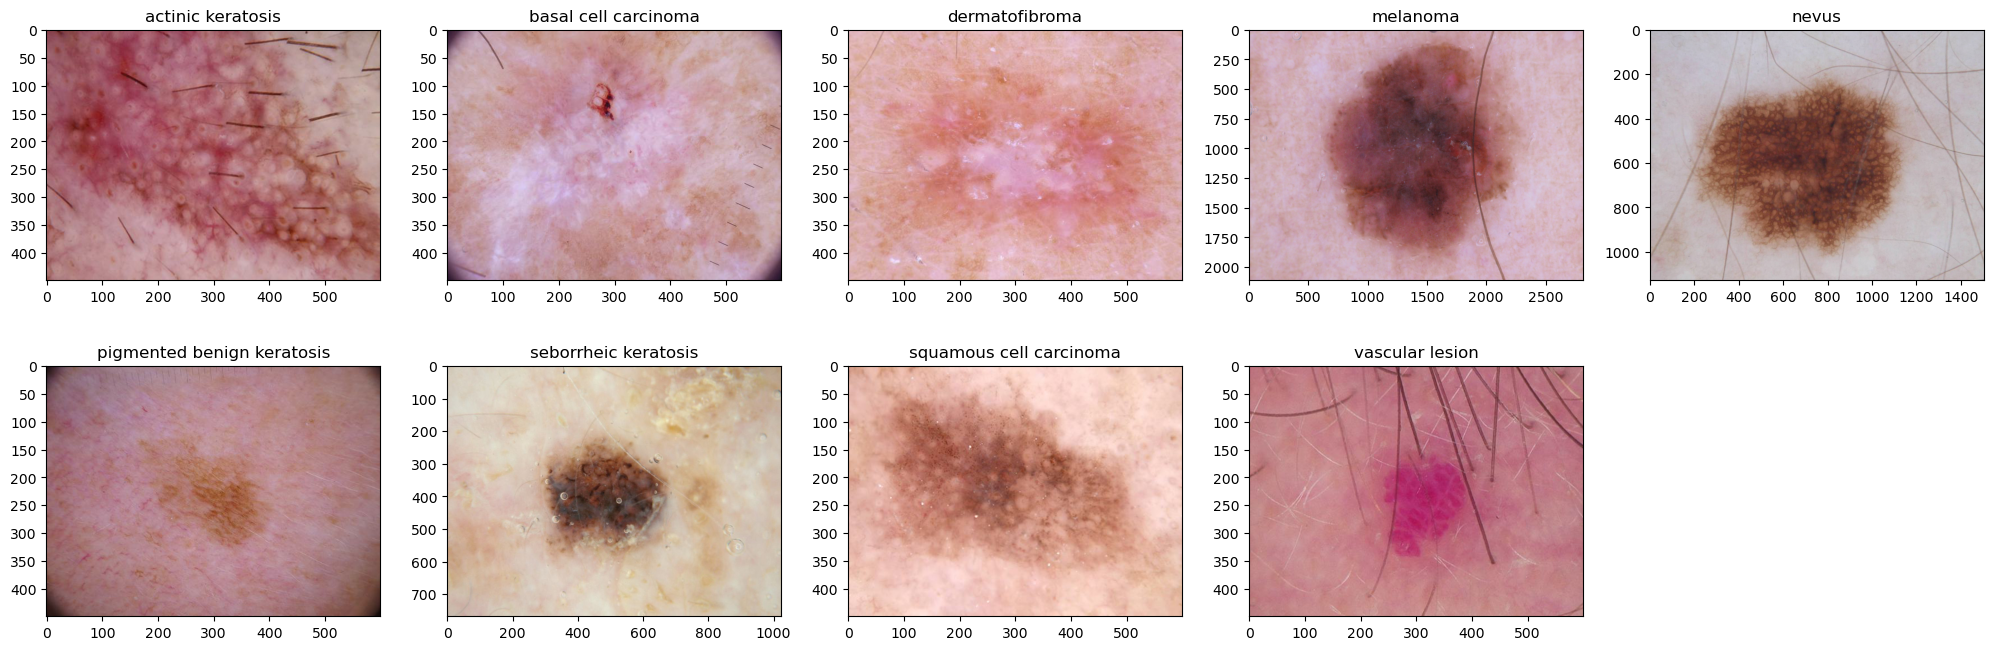

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [46]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# `Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.\
# `Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [48]:
# Method to create plots of the loss and accuracy on the training and validation sets:
def plot_cnn_metrics(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Model Building & training
- Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~20 epochs
- Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [54]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [56]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.1901 - loss: 4.9949 - val_accuracy: 0.3624 - val_loss: 1.9348
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.3039 - loss: 1.9596 - val_accuracy: 0.3266 - val_loss: 1.8303
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.3892 - loss: 1.6895 - val_accuracy: 0.3960 - val_loss: 1.7125
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4741 - loss: 1.4553 - val_accuracy: 0.5145 - val_loss: 1.4654
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5522 - loss: 1.2584 - val_accuracy: 0.4765 - val_loss: 1.5309
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5830 - loss: 1.1880 - val_accuracy: 0.5145 - val_loss: 1.4839
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6435 - loss: 1.0331 - val_accuracy: 0.5503 - val_loss: 1.5116
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6891 - loss: 0.9334 - val_accuracy: 0.5078 - va

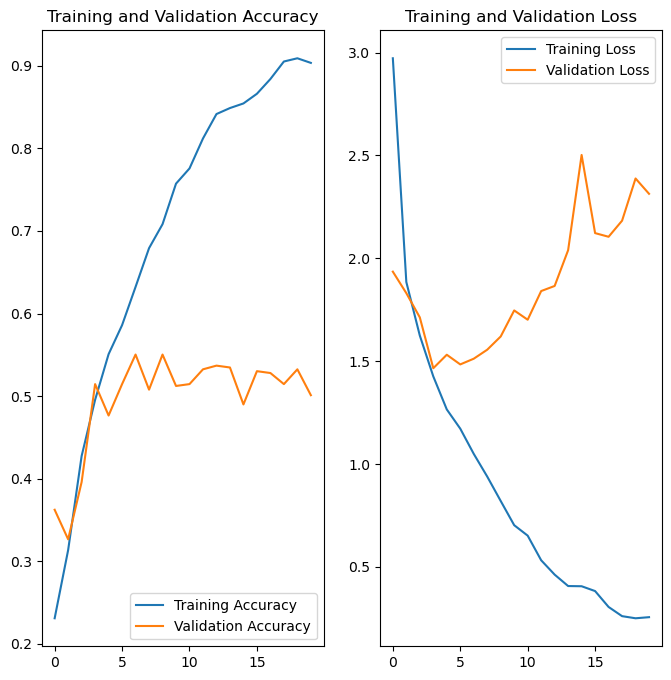

In [63]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

#### Conclusion :
- As the training accuracy increases linearly over time, where as the validation accuracy stall at 50% accuracy in training process.
- As the training loss dereases with epochs the validation loss increases.
- The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved around 50% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is noticeable which is a sign of overfitting.

# Data augmentation

### Choosing an appropriate data augmentation strategy to resolve underfitting/overfitting

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [67]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

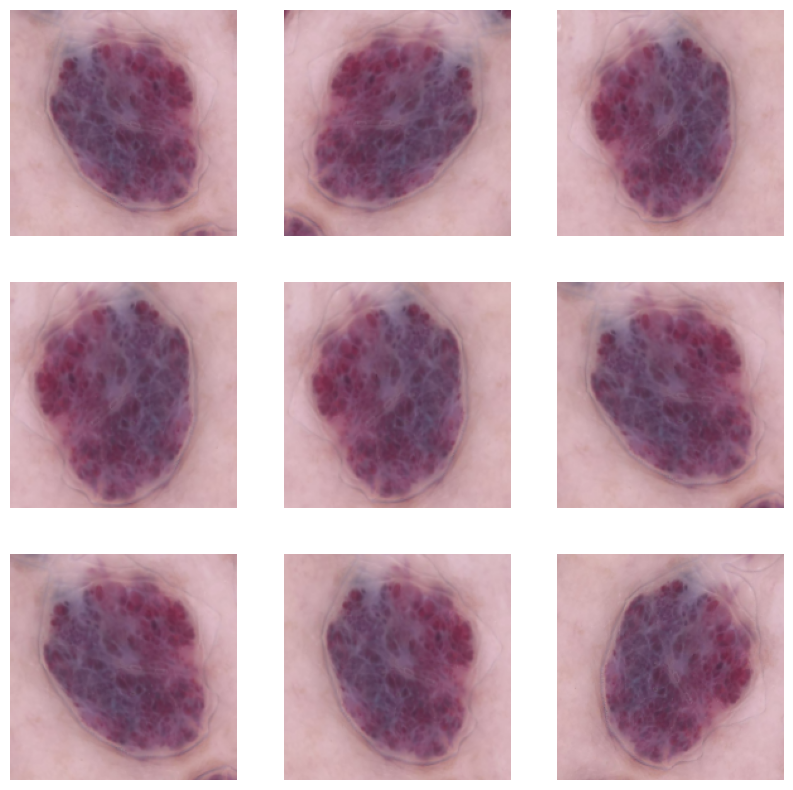

In [206]:
# visualizing how our augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Model Building & training on the augmented data :

- Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~20 epochs
- Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [73]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [75]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.2420 - loss: 7.3038 - val_accuracy: 0.3423 - val_loss: 2.0082
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.3468 - loss: 1.8831 - val_accuracy: 0.3154 - val_loss: 1.9741
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.4246 - loss: 1.6787 - val_accuracy: 0.4966 - val_loss: 1.4896
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5204 - loss: 1.4291 - val_accuracy: 0.5168 - val_loss: 1.4102
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.5026 - loss: 1.4455 - val_accuracy: 0.5078 - val_loss: 1.4861
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5120 - loss: 1.3970 - val_accuracy: 0.5324 - val_loss: 1.3790
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.4941 - loss: 1.3884 - val_accuracy: 0.4832 - val_loss: 1.5003
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5220 - loss: 1.3485 - val_accuracy: 0.5145 - v

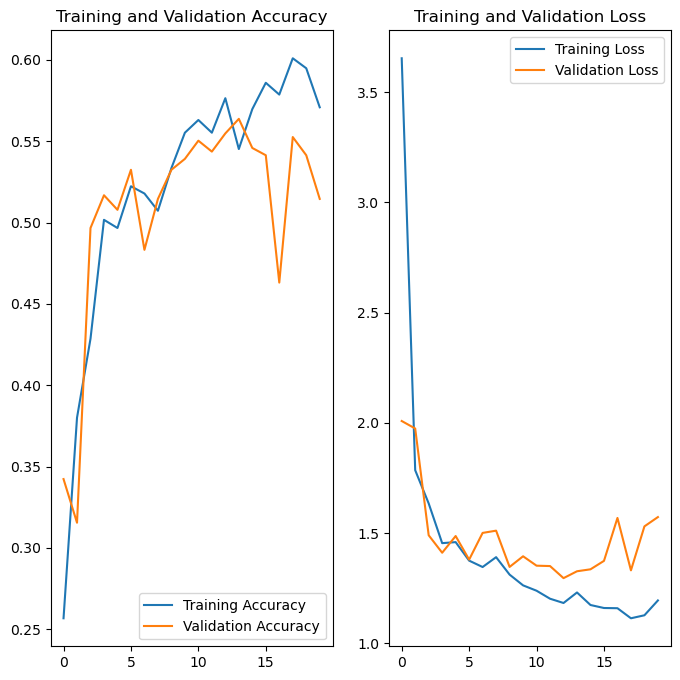

In [79]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

#### Conclusion :
- As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.
- As the training loss decreases with epochs the validation loss decreases and stalls.
- The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around 55% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is still slightly noticeable which is a sign of overfitting.

## Model Building & training on the augmented data with dropout :

- Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~20 epochs
- Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [86]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [88]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.1873 - loss: 5.8675 - val_accuracy: 0.1969 - val_loss: 1.9767
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.2864 - loss: 1.9433 - val_accuracy: 0.3736 - val_loss: 1.7721
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1264s 23s/step - accuracy: 0.3705 - loss: 1.7724 - val_accuracy: 0.4698 - val_loss: 1.5994
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4114 - loss: 1.6219 - val_accuracy: 0.4787 - val_loss: 1.4714
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4832 - loss: 1.4411 - val_accuracy: 0.5168 - val_loss: 1.4730
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1176s 21s/step - accuracy: 0.4945 - loss: 1.4216 - val_accuracy: 0.4631 - val_loss: 1.5348
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.4942 - loss: 1.4370 - val_accuracy: 0.4989 - val_loss: 1.5297
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5389 - loss: 1.3083 - val_accuracy: 0.5078

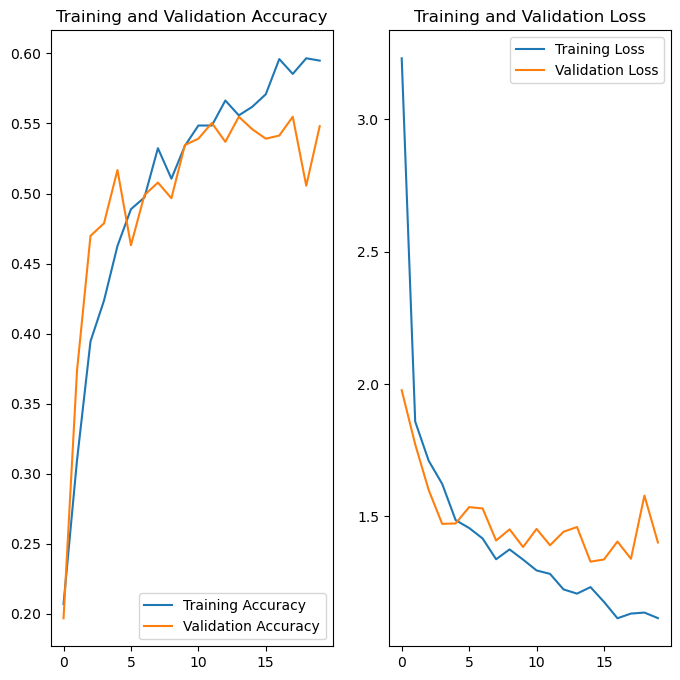

In [92]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

#### Conclusion :
- As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.
- As the training loss decreases with epochs the validation loss decreases and stalls.
- The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around 55% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is still slightly noticeable which is a sign of overfitting.

# Model Building & training on the augmented data with dropout :

- Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~20 epochs
- Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [99]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [101]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.2173 - loss: 6.7494 - val_accuracy: 0.2841 - val_loss: 1.8728
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.3141 - loss: 1.8314 - val_accuracy: 0.4407 - val_loss: 1.6187
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.4380 - loss: 1.5652 - val_accuracy: 0.5078 - val_loss: 1.5041
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5016 - loss: 1.4477 - val_accuracy: 0.4966 - val_loss: 1.4944
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4988 - loss: 1.4426 - val_accuracy: 0.4676 - val_loss: 1.5903
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5098 - loss: 1.4136 - val_accuracy: 0.5168 - val_loss: 1.4405
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5224 - loss: 1.3566 - val_accuracy: 0.5213 - val_loss: 1.4109
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5376 - loss: 1.2742 - val_accuracy: 0.5324 - v

#### Conclusion:
- As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.
- As the training loss decreases with epochs the validation loss decreases
- The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around 55% accuracy - on the validation set.
- The difference in accuracy between training and validation accuracy is very less

-- We can clearly see that the overfitting of the model has redused significantly when compared the earlier models

# Class distribution

Examining the current class distribution in the training dataset

Datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.

Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [112]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


#### Conclusion :
- Which class has the least number of samples?
- seborrheic keratosis with 77 samples
- Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis with 462 samples

# Handling class imbalances:

Rectifing class imbalances present in the training dataset with Augmentor library.

In [117]:
pip install Augmentor

In [33]:
import os
import Augmentor

path_to_training_dataset = r"./Train/"

for i in class_names:
    # Correct path concatenation for training dataset
    training_path = os.path.join(path_to_training_dataset, i)
    
    # Ensure the path exists before creating the pipeline
    if not os.path.exists(training_path):
        print(f"Directory does not exist: {training_path}")
        continue
    
    # Define output directory
    output_path = r"./Output/" + i

    p = Augmentor.Pipeline(training_path, output_directory=output_path)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Adding 500 samples per class


Initialised with 114 image(s) found.
Output directory set to ./Train/actinic keratosis\./Output/actinic keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x235D795A720>: 100%|██████████| 500/500 [00:03<00:00, 139.46 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./Train/basal cell carcinoma\./Output/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x235D7F912E0>: 100%|██████████| 500/500 [00:03<00:00, 139.31 Samples/s]


Initialised with 95 image(s) found.
Output directory set to ./Train/dermatofibroma\./Output/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x235D794CF20>: 100%|██████████| 500/500 [00:03<00:00, 131.51 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to ./Train/melanoma\./Output/melanoma.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x235D7CB94F0>: 100%|██████████| 500/500 [00:20<00:00, 24.01 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to ./Train/nevus\./Output/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x235D7CE1340>: 100%|██████████| 500/500 [00:21<00:00, 23.61 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to ./Train/pigmented benign keratosis\./Output/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x235D7F93B00>: 100%|██████████| 500/500 [00:04<00:00, 114.88 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to ./Train/seborrheic keratosis\./Output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x235D79980B0>: 100%|██████████| 500/500 [00:09<00:00, 50.32 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to ./Train/squamous cell carcinoma\./Output/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x235D7CA99A0>: 100%|██████████| 500/500 [00:04<00:00, 109.65 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to ./Train/vascular lesion\./Output/vascular lesion.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x235D7CCD460>: 100%|██████████| 500/500 [00:04<00:00, 108.31 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
data_dir_train = pathlib.Path(r"./Output/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [45]:
dict_new = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])

In [47]:
df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [160]:
# initializing the parameter to load the images
batch_size = 32
img_height = 180
img_width = 180

In [162]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [164]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


## Model Building & training on the rectified class imbalance data :

- Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
- Choosing an appropriate optimiser and loss function for model training
- Training the model for ~30 epochs
- Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [168]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [170]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 259200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    66,355,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,433,417 (253.42 MB)

 Trainable params: 66,433,417 (253.42 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.2038 - loss: 4.3572 - val_accuracy: 0.3600 - val_loss: 1.6243
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.3608 - loss: 1.6160 - val_accuracy: 0.3978 - val_loss: 1.5245
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.4357 - loss: 1.5115 - val_accuracy: 0.4511 - val_loss: 1.5078
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.4529 - loss: 1.4374 - val_accuracy: 0.3722 - val_loss: 1.7254
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.4500 - loss: 1.4385 - val_accuracy: 0.4622 - val_loss: 1.3911
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.4957 - loss: 1.2871 - val_accuracy: 0.5100 - val_loss: 1.3004
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.4995 - loss: 1.3323 - val_accuracy: 0.4844 - val_loss: 1.3494
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.5036 - loss: 1.2920 - val_accu

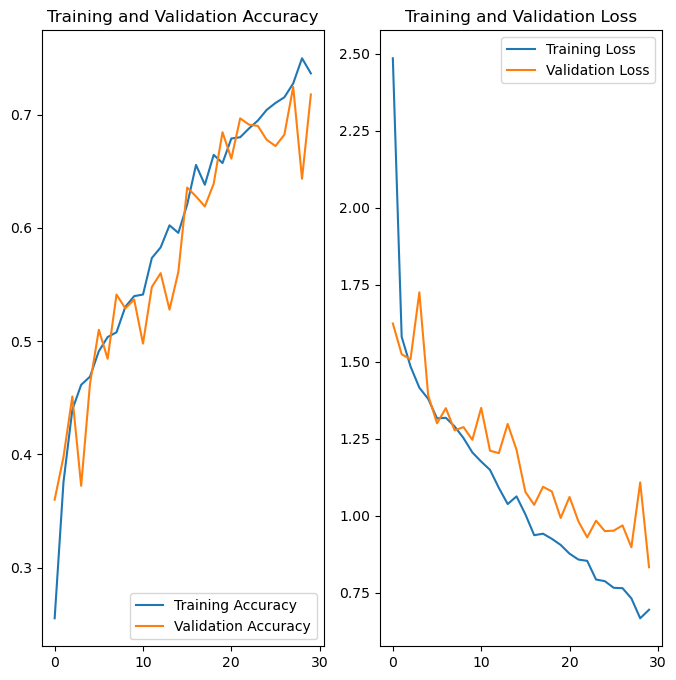

In [182]:
# Visualizing model results
plot_cnn_metrics(history,epochs)

#### Conclusion :
- As the training accuracy increases linearly over time, where as the validation accuracy increases in training process.
- As the training loss decreases with epochs the validation loss also decreases.
- The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around 75% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is very less
- Class rebalancing not only got rid of overfitting it also improved the accuracy from 55% to 75%.